In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/logistic-regression/heart.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/logistic-regression/heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df.shape

(303, 14)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 1
(303, 14)


In [10]:
df.drop_duplicates(inplace=True) 

**Univariate Analysis**

In [11]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

In [12]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

14

Description of age
----------------------------------------------------------------------------
count    302.00000
mean      54.42053
std        9.04797
min       29.00000
25%       48.00000
50%       55.50000
75%       61.00000
max       77.00000
Name: age, dtype: float64 Distribution of age
----------------------------------------------------------------------------


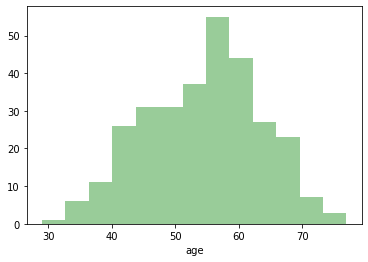

BoxPlot of age
----------------------------------------------------------------------------


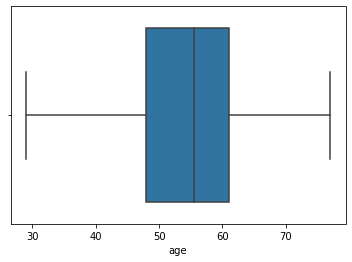

Description of sex
----------------------------------------------------------------------------
count    302.000000
mean       0.682119
std        0.466426
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: sex, dtype: float64 Distribution of sex
----------------------------------------------------------------------------


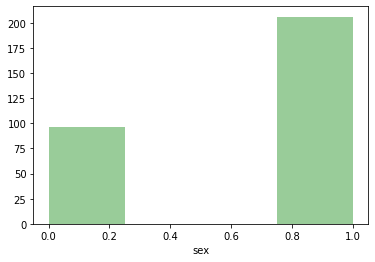

BoxPlot of sex
----------------------------------------------------------------------------


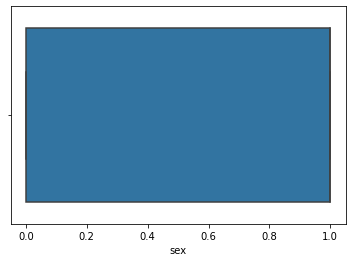

Description of cp
----------------------------------------------------------------------------
count    302.000000
mean       0.963576
std        1.032044
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: cp, dtype: float64 Distribution of cp
----------------------------------------------------------------------------


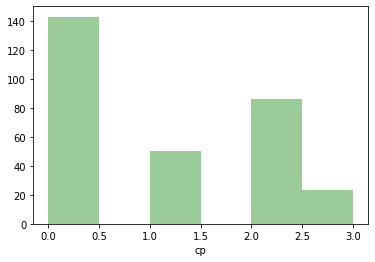

BoxPlot of cp
----------------------------------------------------------------------------


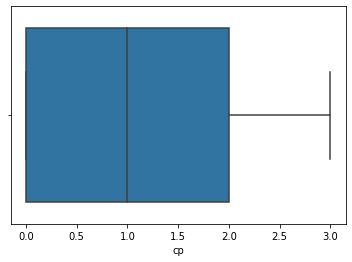

Description of trestbps
----------------------------------------------------------------------------
count    302.000000
mean     131.602649
std       17.563394
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64 Distribution of trestbps
----------------------------------------------------------------------------


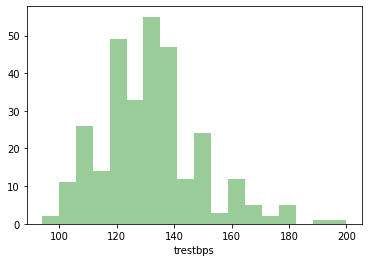

BoxPlot of trestbps
----------------------------------------------------------------------------


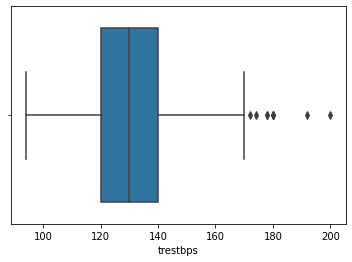

Description of chol
----------------------------------------------------------------------------
count    302.000000
mean     246.500000
std       51.753489
min      126.000000
25%      211.000000
50%      240.500000
75%      274.750000
max      564.000000
Name: chol, dtype: float64 Distribution of chol
----------------------------------------------------------------------------


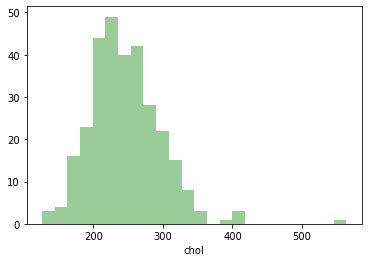

BoxPlot of chol
----------------------------------------------------------------------------


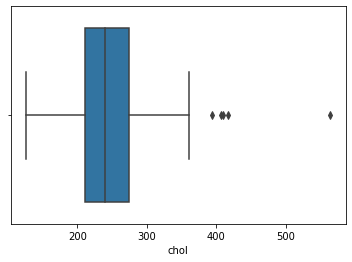

Description of fbs
----------------------------------------------------------------------------
count    302.000000
mean       0.149007
std        0.356686
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64 Distribution of fbs
----------------------------------------------------------------------------


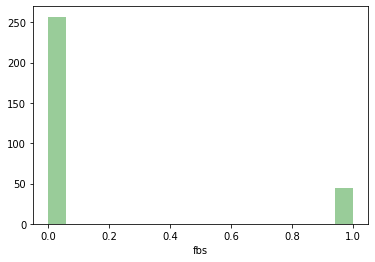

BoxPlot of fbs
----------------------------------------------------------------------------


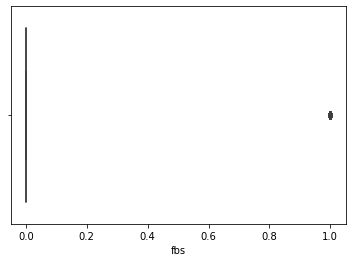

Description of restecg
----------------------------------------------------------------------------
count    302.000000
mean       0.526490
std        0.526027
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: restecg, dtype: float64 Distribution of restecg
----------------------------------------------------------------------------


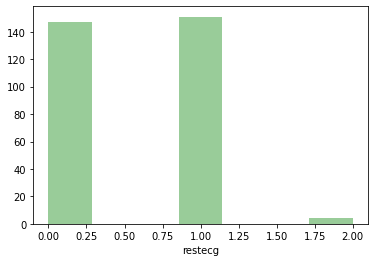

BoxPlot of restecg
----------------------------------------------------------------------------


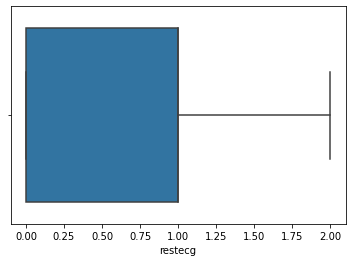

Description of thalach
----------------------------------------------------------------------------
count    302.000000
mean     149.569536
std       22.903527
min       71.000000
25%      133.250000
50%      152.500000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64 Distribution of thalach
----------------------------------------------------------------------------


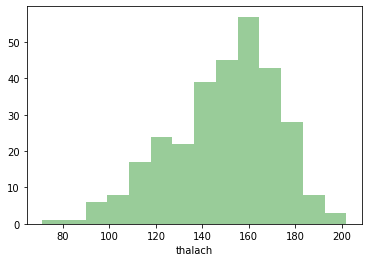

BoxPlot of thalach
----------------------------------------------------------------------------


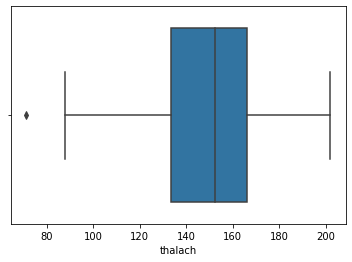

Description of exang
----------------------------------------------------------------------------
count    302.000000
mean       0.327815
std        0.470196
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: exang, dtype: float64 Distribution of exang
----------------------------------------------------------------------------


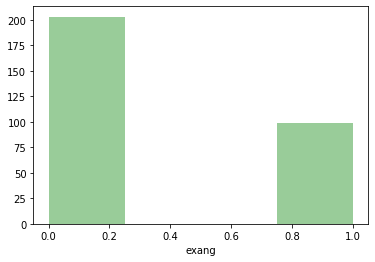

BoxPlot of exang
----------------------------------------------------------------------------


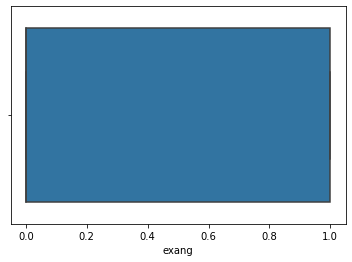

Description of oldpeak
----------------------------------------------------------------------------
count    302.000000
mean       1.043046
std        1.161452
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64 Distribution of oldpeak
----------------------------------------------------------------------------


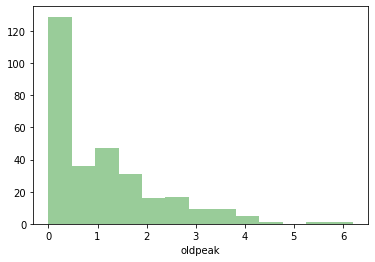

BoxPlot of oldpeak
----------------------------------------------------------------------------


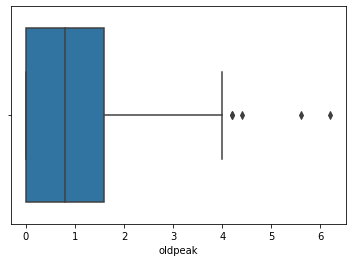

Description of slope
----------------------------------------------------------------------------
count    302.000000
mean       1.397351
std        0.616274
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: slope, dtype: float64 Distribution of slope
----------------------------------------------------------------------------


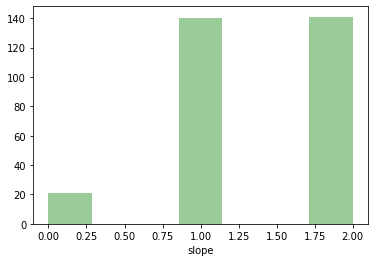

BoxPlot of slope
----------------------------------------------------------------------------


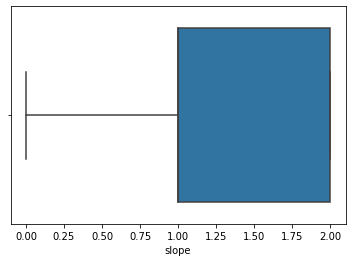

Description of ca
----------------------------------------------------------------------------
count    302.000000
mean       0.718543
std        1.006748
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: ca, dtype: float64 Distribution of ca
----------------------------------------------------------------------------


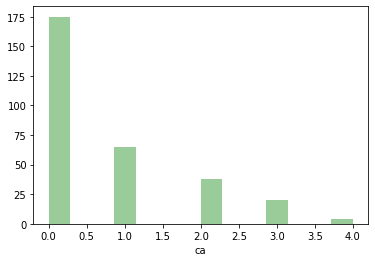

BoxPlot of ca
----------------------------------------------------------------------------


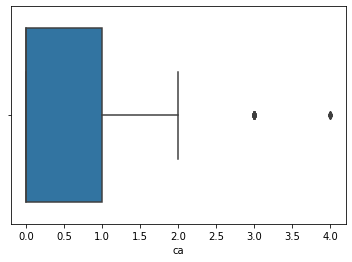

Description of thal
----------------------------------------------------------------------------
count    302.000000
mean       2.314570
std        0.613026
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: thal, dtype: float64 Distribution of thal
----------------------------------------------------------------------------


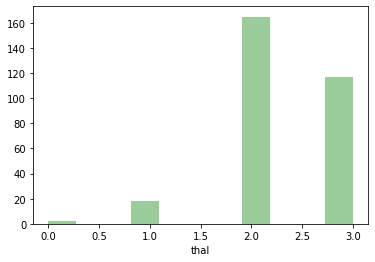

BoxPlot of thal
----------------------------------------------------------------------------


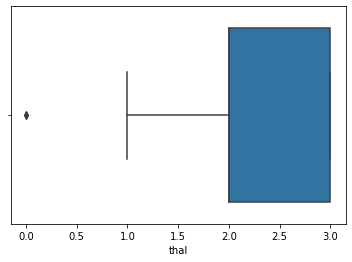

Description of target
----------------------------------------------------------------------------
count    302.000000
mean       0.543046
std        0.498970
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64 Distribution of target
----------------------------------------------------------------------------


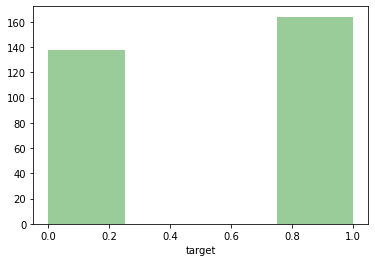

BoxPlot of target
----------------------------------------------------------------------------


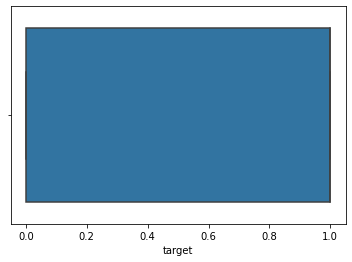

In [13]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

<AxesSubplot:>

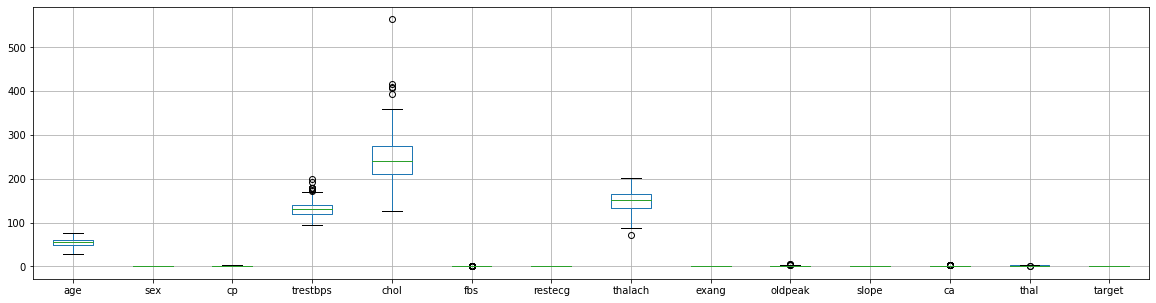

In [14]:
df.boxplot(figsize=(20,5))

**Bivariate Analysis**

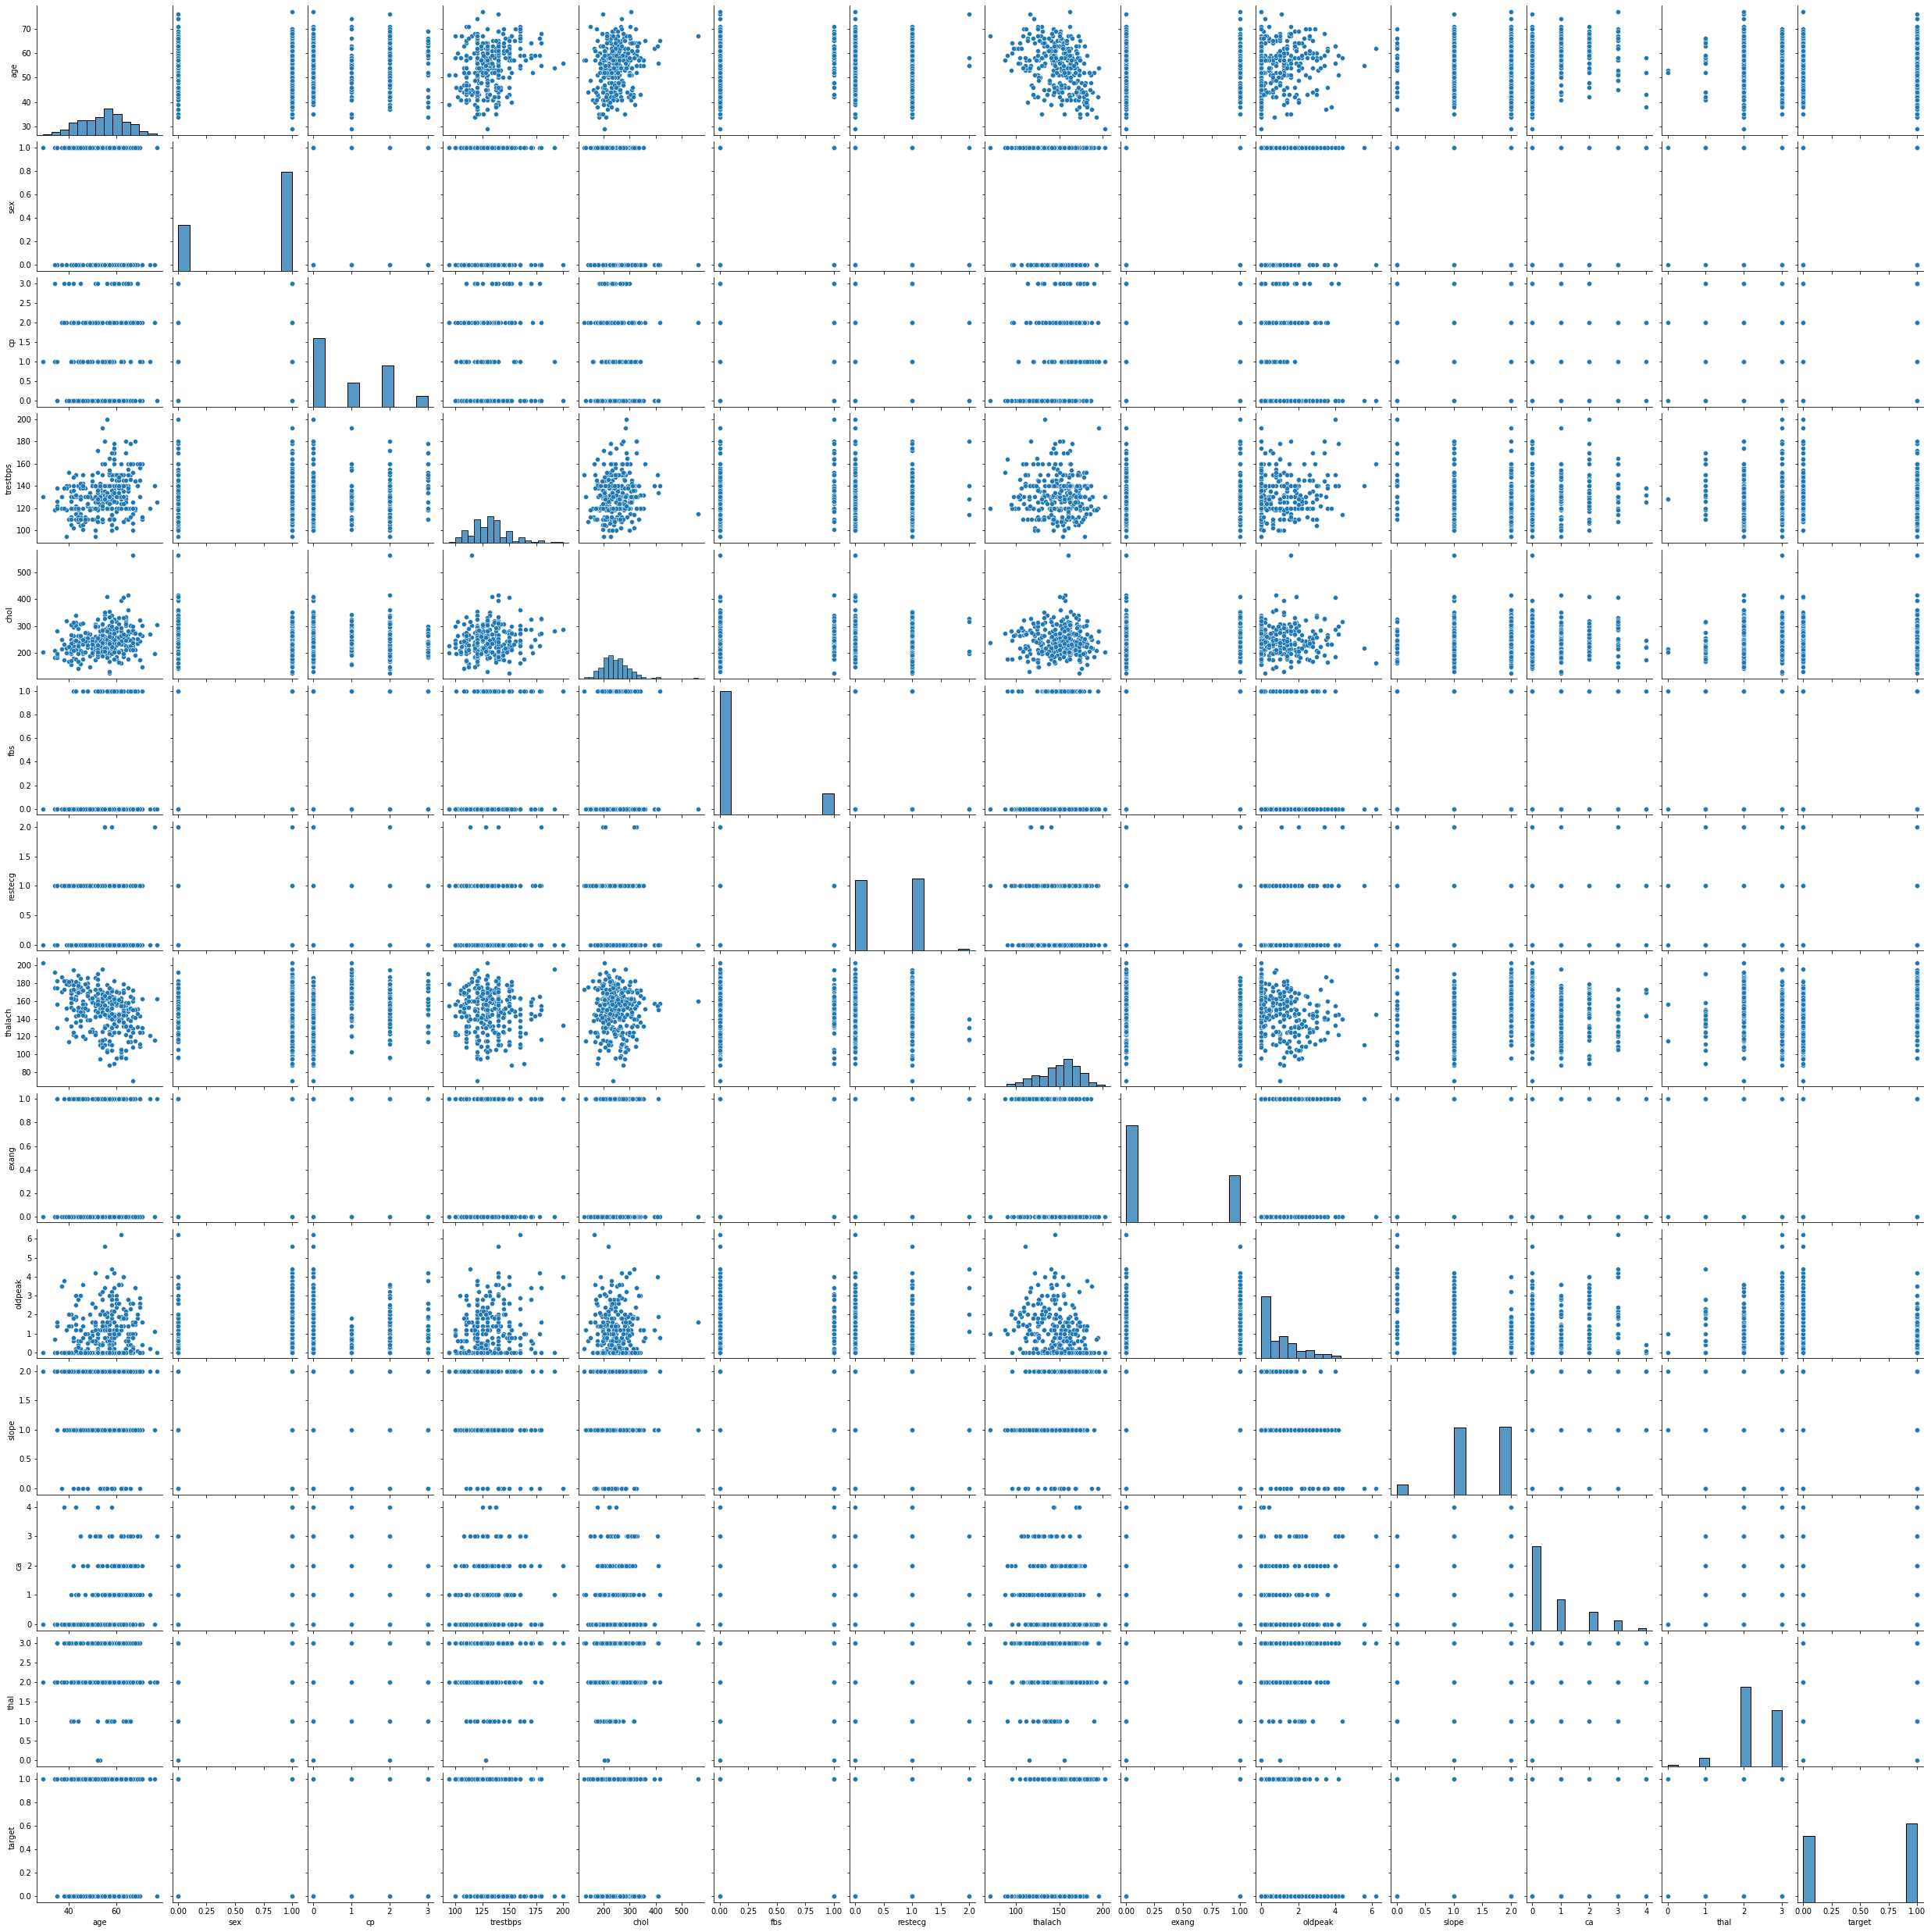

In [15]:
sns.pairplot(data=df)

In [16]:
corr = df.corr(method='pearson')

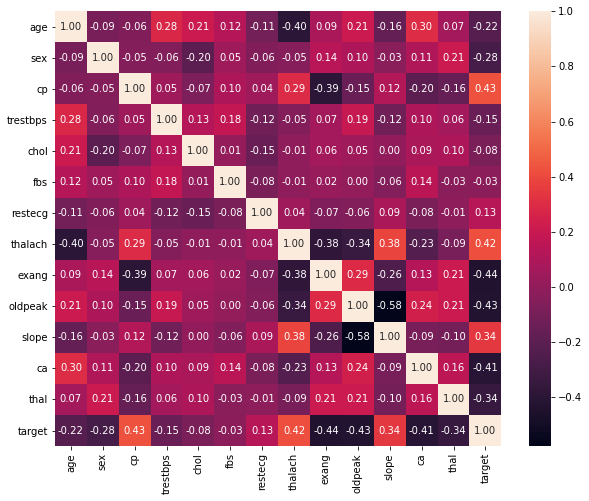

In [17]:
fig = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True,fmt='.2f')
plt.show()

**Treating Outliers**

In [18]:
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='object')].index

In [19]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [20]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

<AxesSubplot:>

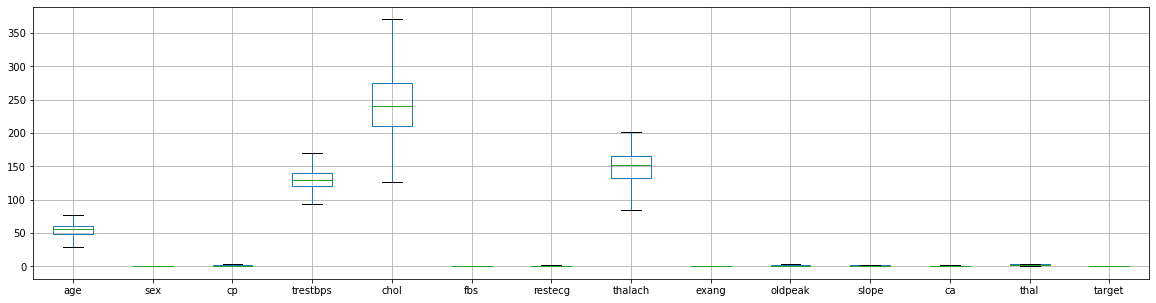

In [21]:
df.boxplot(figsize=(20,5))

**Logistic Regression**

In [22]:
X = df.drop("target" , axis=1)

y = df.pop("target")

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1, stratify=y)

In [24]:
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.3s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [25]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [26]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.933266,0.066734
1,0.191019,0.808981
2,0.250394,0.749606
3,0.991316,0.008684
4,0.567348,0.432652


In [27]:
# Accuracy - Train Data
model.score(X_train, y_train)

0.8578199052132701

AUC: 0.921


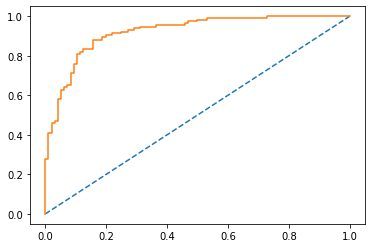

In [28]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [29]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.8791208791208791

AUC: 0.921


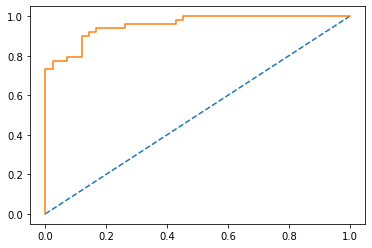

In [30]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [31]:
confusion_matrix(y_train, ytrain_predict)

array([[ 77,  19],
       [ 11, 104]])

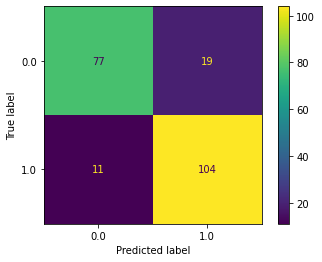

In [32]:
plot_confusion_matrix(model,X_train,y_train);

In [33]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.88      0.80      0.84        96
         1.0       0.85      0.90      0.87       115

    accuracy                           0.86       211
   macro avg       0.86      0.85      0.86       211
weighted avg       0.86      0.86      0.86       211



In [34]:
confusion_matrix(y_test, ytest_predict)

array([[35,  7],
       [ 4, 45]])

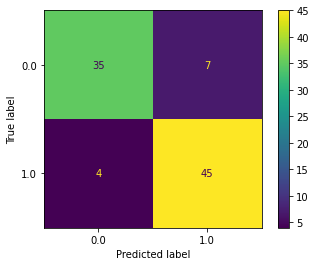

In [35]:
plot_confusion_matrix(model,X_test,y_test);

In [36]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.90      0.83      0.86        42
         1.0       0.87      0.92      0.89        49

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91

